# Diabetes Prediction Dataset Test

This notebook tests the download and loading of the UCI Diabetes dataset from Kaggle.

In [1]:
# Install required packages
%pip install kagglehub pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

# Download the dataset to current directory
print("Downloading UCI Diabetes dataset...")
cache_path = kagglehub.dataset_download("mathchi/diabetes-data-set")

# Copy to current folder
current_dir = os.getcwd()
local_data_dir = current_dir
os.makedirs(local_data_dir, exist_ok=True)

# Copy files from cache to local directory
for file in os.listdir(cache_path):
    src = os.path.join(cache_path, file)
    dst = os.path.join(local_data_dir, file)
    shutil.copy2(src, dst)
    print(f"Copied {file} to local data folder")

path = local_data_dir
print(f"Dataset available locally at: {path}")

/home/tamim/ai4ph/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Copied diabetes.csv to local data folder
Dataset available locally at: /home/tamim/ai4ph/data/diabetes_prediction


In [3]:
# Check dataset size
total_size = 0
files = os.listdir(path)
for file in files:
    file_path = os.path.join(path, file)
    size = os.path.getsize(file_path)
    total_size += size
    print(f"- {file}: {size/1024:.1f} KB")

print(f"\nTotal dataset size: {total_size/(1024*1024):.2f} MB")

- README.md: 1.0 KB
- dataset_download.ipynb: 218.4 KB
- diabetes.csv: 23.3 KB

Total dataset size: 0.24 MB


In [4]:
# Load and explore the data
csv_files = [f for f in files if f.endswith('.csv')]
if csv_files:
    df = pd.read_csv(os.path.join(path, csv_files[0]))
    
    print(f"Dataset shape: {df.shape}")
    print(f"\nColumns: {list(df.columns)}")
    print(f"\nData types:\n{df.dtypes}")
    print(f"\nFirst 5 rows:\n{df.head()}")
    
    # Check target variable
    target_col = 'Outcome' if 'Outcome' in df.columns else df.columns[-1]
    print(f"\nTarget variable '{target_col}' distribution:")
    print(df[target_col].value_counts())
    
    # Basic statistics
    print(f"\nBasic statistics:\n{df.describe()}")

Dataset shape: (768, 9)

Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome 

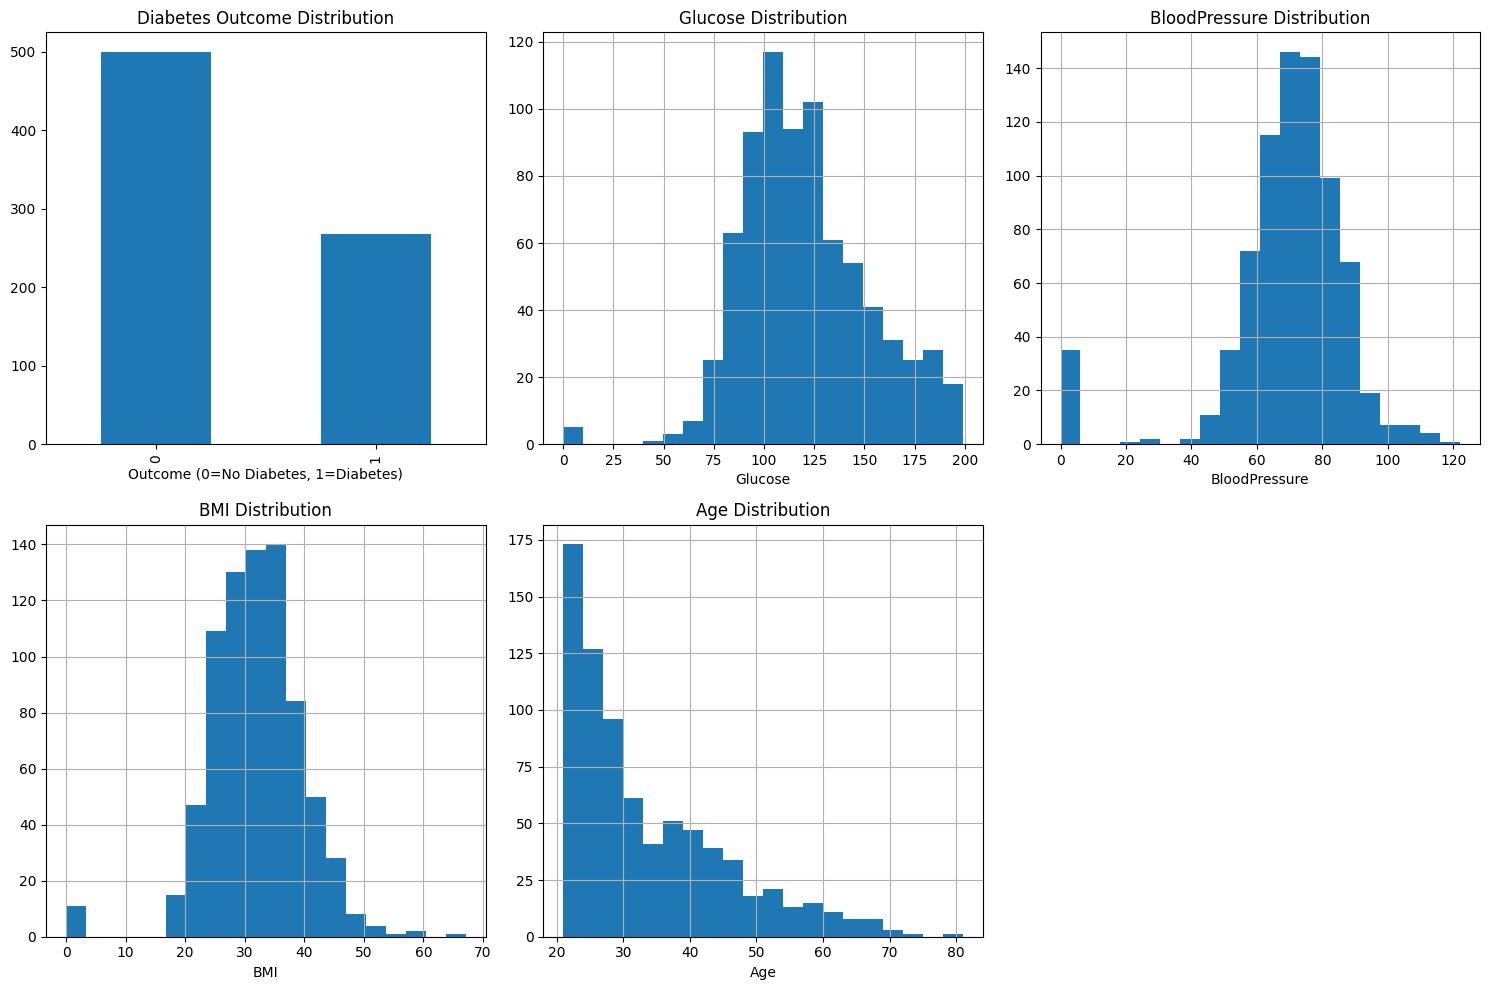

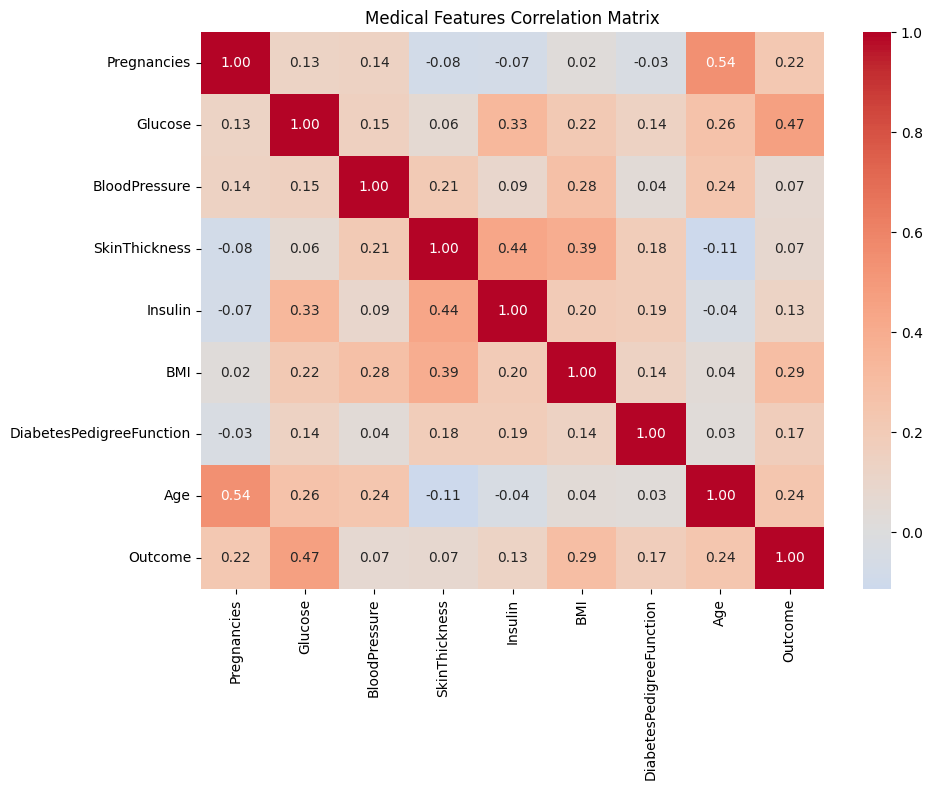

In [5]:
# Create medical visualizations
if csv_files and len(df) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    # Target distribution
    target_col = 'Outcome' if 'Outcome' in df.columns else df.columns[-1]
    df[target_col].value_counts().plot(kind='bar', ax=axes[0])
    axes[0].set_title('Diabetes Outcome Distribution')
    axes[0].set_xlabel('Outcome (0=No Diabetes, 1=Diabetes)')
    
    # Key medical indicators
    medical_features = ['Glucose', 'BloodPressure', 'BMI', 'Age']
    available_features = [col for col in medical_features if col in df.columns]
    
    for i, feature in enumerate(available_features[:4]):
        if i+1 < len(axes):
            df[feature].hist(bins=20, ax=axes[i+1])
            axes[i+1].set_title(f'{feature} Distribution')
            axes[i+1].set_xlabel(feature)
    
    # Hide unused subplots
    for j in range(len(available_features)+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Medical Features Correlation Matrix')
    plt.tight_layout()
    plt.show()

In [6]:
# Analyze medical patterns
if csv_files and len(df) > 0:
    target_col = 'Outcome' if 'Outcome' in df.columns else df.columns[-1]
    
    print("\nMedical Analysis:")
    print(f"- Total patients: {len(df)}")
    print(f"- Diabetes cases: {df[target_col].sum()} ({df[target_col].mean()*100:.1f}%)")
    print(f"- Non-diabetes cases: {len(df) - df[target_col].sum()} ({(1-df[target_col].mean())*100:.1f}%)")
    
    # Compare features between diabetes and non-diabetes groups
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    numeric_cols = [col for col in numeric_cols if col != target_col]
    
    if len(numeric_cols) > 0:
        print(f"\nAverage values by diabetes status:")
        comparison = df.groupby(target_col)[numeric_cols[:5]].mean()
        print(comparison)


Medical Analysis:
- Total patients: 768
- Diabetes cases: 268 (34.9%)
- Non-diabetes cases: 500 (65.1%)

Average values by diabetes status:
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin
Outcome                                                                   
0           3.298000  109.980000      68.184000      19.664000   68.792000
1           4.865672  141.257463      70.824627      22.164179  100.335821


In [7]:
print("✅ Dataset download and analysis completed successfully!")
print("\nDataset Summary:")
print(f"- Location: {path}")
print(f"- Size: {total_size/(1024*1024):.2f} MB (Small & manageable!)")
if csv_files:
    print(f"- Patients: {df.shape[0]:,}")
    print(f"- Medical features: {df.shape[1]}")
print("- Use case: Diabetes prediction, metabolic health analysis")
print("- Perfect for: Module 5 (Machine Learning), Module 7 (Public Health Modeling)")

✅ Dataset download and analysis completed successfully!

Dataset Summary:
- Location: /home/tamim/ai4ph/data/diabetes_prediction
- Size: 0.24 MB (Small & manageable!)
- Patients: 768
- Medical features: 9
- Use case: Diabetes prediction, metabolic health analysis
- Perfect for: Module 5 (Machine Learning), Module 7 (Public Health Modeling)
